In [113]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real, realcontour_nd
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from plind_tests.gaussian import Gaussian

%reload_ext autoreload

%autoreload 2

%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [114]:
testfunction = Gaussian(2)


In [115]:
# init model
lamb = 1
delta = 0.6
Nstep = 150
dt_init = 8e-3
thresh =-8
tmax = dt_init*Nstep

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))


plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)

In [117]:
#%lprun -f plmodel.descend plind.descend(delta, thresh, tmax, dt_init)
%time
plind.descend(delta, thresh, tmax, dt_init)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs
total steps: 15 current time: 1.2724163626689367


/Users/DylanJow/plind/plind/descend/core.py:40: RuntimeWarning: divide by zero encountered in true_divide
  delta = np.min((np.divide(tol,2*R))**(1/4))


In [82]:
plind.integrate()
print(plind.integral)
print(testfunction.integral(*testfunction.expargs))
print(np.imag(testfunction.integral(*testfunction.expargs))/np.imag(plind.integral))

(0.00101279317649164+3.131088395552255j)
3.141592653589793j
1.0033548264087528


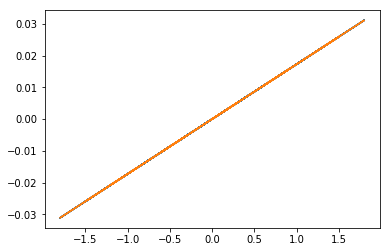

In [20]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

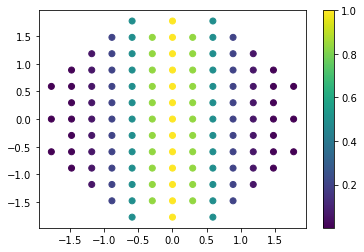

NameError: name 'zs' is not defined

In [63]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
zs = np.real(plind.contour.points[:,2])

xs = np.imag(plind.contour.points[:,0])
ys = np.imag(plind.contour.points[:,1])
zs = np.imag(plind.contour.points[:,2])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
#triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
#plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, zs, c=intvals.real)
plt.colorbar()
plt.show()

plt.figure
plt.scatter(ys,zs,c=intvals.real)
plt.colorbar()
plt.show()

# split_edges_nb vs split_edges

In [141]:
from plind.contour.split_edges import *

In [176]:
# init model
lamb = 1
delta = 0.1
Nstep = 150
dt_init = 8e-3
thresh =-8
tmax = dt_init*Nstep

#%lprun -f realcontour_nd realcontour_nd(5, (-0.5,0.5,-0.5,0.5))

contour = realcontour_nd(10, (-0.5,0.5,-0.5,0.5))

plind = plmodel(contour, testfunction.expfun, grad=testfunction.gradh, expargs=testfunction.expargs)

In [177]:
points = contour.points
edges = contour.edges.astype(np.int64)
simplices = contour.simplices.astype(np.int64)
ndim = contour.ndim

lengths = plind.contour.get_edgelengths()
bad_edges = edges[lengths > delta]
indices = np.where(lengths > delta)

In [178]:
%%time
N = 5
for i in np.arange(N):
    new_points, new_edges, new_simplices = split_edges(points, edges, simplices, ndim, bad_edges, indices)
    
    

CPU times: user 243 ms, sys: 3.44 ms, total: 247 ms
Wall time: 250 ms


In [182]:
%%time
N = 5
for i in np.arange(N):
    new_points, new_edges, new_simplices = split_edges_nb(points, edges, simplices, contour.ndim, bad_edges, indices)
    
    

CPU times: user 133 ms, sys: 1.13 ms, total: 134 ms
Wall time: 134 ms
